# Fuse data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import shutil
from tqdm import tqdm
from src.detection.prepare_data import generate_data_yaml, generate_meta_df
from src.detection.category_utils import CATIDX_2_FR_CATNAME

In [2]:
", ".join(CATIDX_2_FR_CATNAME.values())

"Papier d'aluminium, Batterie, Plaquette thermoformée en aluminium, Plaquette thermoformée à carte, Autre bouteille en plastique, Bouteille en plastique transparente, Bouteille en verre, Bouchon de bouteille en plastique, Bouchon de bouteille en métal, Verre brisé, Boîte de conserve, Aérosol, Canette de boisson, Tube de papier toilette, Autre carton, Boîte à œufs, Brique de boisson, Carton ondulé, Boîte alimentaire en carton, Boîte à pizza, Gobelet en papier, Gobelet en plastique jetable, Gobelet en mousse, Tasse en verre, Autre gobelet en plastique, Déchets alimentaires, Pot en verre, Couvercle en plastique, Couvercle en métal, Autre plastique, Papier de magazine, Mouchoirs, Papier d'emballage, Papier ordinaire, Sac en papier, Sac en papier plastifié, Film plastique, Anneaux de canette, Sac poubelle, Autre emballage en plastique, Sac à usage unique, Sac en polypropylène, Paquet de chips, Pot de tartinade, Tupperware, Contenant alimentaire jetable, Contenant alimentaire en mousse, Autr

In [3]:
print(len(CATIDX_2_FR_CATNAME.values()))
print(CATIDX_2_FR_CATNAME.values())

82
dict_values(["Papier d'aluminium", 'Batterie', 'Plaquette thermoformée en aluminium', 'Plaquette thermoformée à carte', 'Autre bouteille en plastique', 'Bouteille en plastique transparente', 'Bouteille en verre', 'Bouchon de bouteille en plastique', 'Bouchon de bouteille en métal', 'Verre brisé', 'Boîte de conserve', 'Aérosol', 'Canette de boisson', 'Tube de papier toilette', 'Autre carton', 'Boîte à œufs', 'Brique de boisson', 'Carton ondulé', 'Boîte alimentaire en carton', 'Boîte à pizza', 'Gobelet en papier', 'Gobelet en plastique jetable', 'Gobelet en mousse', 'Tasse en verre', 'Autre gobelet en plastique', 'Déchets alimentaires', 'Pot en verre', 'Couvercle en plastique', 'Couvercle en métal', 'Autre plastique', 'Papier de magazine', 'Mouchoirs', "Papier d'emballage", 'Papier ordinaire', 'Sac en papier', 'Sac en papier plastifié', 'Film plastique', 'Anneaux de canette', 'Sac poubelle', 'Autre emballage en plastique', 'Sac à usage unique', 'Sac en polypropylène', 'Paquet de chips

## 1st dataset : TACO

In [17]:
TACO_DATASET_ROOT_PATH = r"N:\My Drive\KESKIA Drive Mlamali\datasets\processed\taco-dataset (yoloformat) train-3826-val-479-test-479 20231226_03"

def print_tree_structure(root_path):
    for root, dirs, files in os.walk(root_path):
        level = root.replace(root_path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}> {}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        # nb of files in each folder
        print(f'{subindent}{len(files)} files : {files[:2]} ...')

print_tree_structure(TACO_DATASET_ROOT_PATH)

> taco-dataset (yoloformat) train-3826-val-479-test-479 20231226_03/
    3 files : ['class_distribution.png', 'data.yaml'] ...
    > train/
        1 files : ['labels.cache'] ...
        > images/
            1350 files : ['batch_1_000003.jpg', 'batch_1_000001.jpg'] ...
        > labels/
            1350 files : ['batch_1_000003.txt', 'batch_1_000001.txt'] ...
    > val/
        1 files : ['labels.cache'] ...
        > images/
            367 files : ['batch_1_000014.jpg', 'batch_1_000010.jpg'] ...
        > labels/
            367 files : ['batch_1_000014.txt', 'batch_1_000010.txt'] ...
    > test/
        1 files : ['labels.cache'] ...
        > images/
            370 files : ['batch_1_000014.jpg', 'batch_1_000024.jpg'] ...
        > labels/
            370 files : ['batch_1_000014.txt', 'batch_1_000024.txt'] ...


## 2nd dataset : Personalized dataset (RoboFlow)

In [20]:
ROBOFLOW_DATASET_ROOT_PATH = r"N:\My Drive\KESKIA Drive Mlamali\datasets\processed\detection-dechets-sauvages.v3i.yolov8"
print_tree_structure(ROBOFLOW_DATASET_ROOT_PATH)

> detection-dechets-sauvages.v3i.yolov8/
    3 files : ['README.dataset.txt', 'README.roboflow.txt'] ...
    > test/
        0 files : [] ...
        > images/
            404 files : ['103376969_1141501419555288_5732204628180766289_n_jpg.rf.6dc74dabdeffc43a5b68105924b8cae9.jpg', '109746666_140979007652354_7385908406460374962_n_jpg.rf.b051b1c876be2eec4b6afc623f2db59c.jpg'] ...
        > labels/
            404 files : ['103376969_1141501419555288_5732204628180766289_n_jpg.rf.6dc74dabdeffc43a5b68105924b8cae9.txt', '109746666_140979007652354_7385908406460374962_n_jpg.rf.b051b1c876be2eec4b6afc623f2db59c.txt'] ...
    > train/
        0 files : [] ...
        > images/
            2832 files : ['0_McDonald-s-drink-with-paper-straw-1697294_png.rf.baaaeaa4c9a32f6d3695e05a4fa88829.jpg', '0e01938fc48a2cfb5f2217fbfb00722d-1680253086_jpg.rf.ac3543e450398a2ce62b7664f650eec3.jpg'] ...
        > labels/
            2832 files : ['0_McDonald-s-drink-with-paper-straw-1697294_png.rf.baaaeaa4c9a32f6d36

In [21]:
roboflow_meta_df = generate_meta_df(ROBOFLOW_DATASET_ROOT_PATH,catidx_2_catname=CATIDX_2_FR_CATNAME, n_jobs=2)
roboflow_meta_df

> Generating meta_df for N:\My Drive\KESKIA Drive Mlamali\datasets\processed\detection-dechets-sauvages.v3i.yolov8


Processing test dataset: 100%|██████████| 404/404 [00:37<00:00, 10.88it/s]


> Done. meta_df shape: (10045, 13)
                                                path  \
0  train/images/0_McDonald-s-drink-with-paper-str...   
1  train/images/0_McDonald-s-drink-with-paper-str...   
2  train/images/0_McDonald-s-drink-with-paper-str...   
3  train/images/0_McDonald-s-drink-with-paper-str...   
4  train/images/0e01938fc48a2cfb5f2217fbfb00722d-...   

                                            img_file  img_width  img_height  \
0  0_McDonald-s-drink-with-paper-straw-1697294_pn...       1200        1573   
1  0_McDonald-s-drink-with-paper-straw-1697294_pn...       1200        1573   
2  0_McDonald-s-drink-with-paper-straw-1697294_pn...       1200        1573   
3  0_McDonald-s-drink-with-paper-straw-1697294_pn...       1200        1573   
4  0e01938fc48a2cfb5f2217fbfb00722d-1680253086_jp...       1920        1080   

   cat_id                      cat_name  ann_id        cx        cy     width  \
0      56              Paille en papier       0  0.251892  0.212212  0.0

,path,img_file,img_width,img_height,cat_id,cat_name,ann_id,cx,cy,width,height,area,split
0,train/images/0_McDonald-s-drink-with-paper-str...,0_McDonald-s-drink-with-paper-straw-1697294_pn...,1200,1573,56,Paille en papier,0,0.251892,0.212212,0.088433,0.376955,62923.8540,train
1,train/images/0_McDonald-s-drink-with-paper-str...,0_McDonald-s-drink-with-paper-straw-1697294_pn...,1200,1573,56,Paille en papier,1,0.785317,0.264342,0.119367,0.320172,72139.9612,train
2,train/images/0_McDonald-s-drink-with-paper-str...,0_McDonald-s-drink-with-paper-straw-1697294_pn...,1200,1573,21,Gobelet en plastique jetable,2,0.357425,0.618315,0.597375,0.629727,710082.9360,train
3,train/images/0_McDonald-s-drink-with-paper-str...,0_McDonald-s-drink-with-paper-straw-1697294_pn...,1200,1573,21,Gobelet en plastique jetable,3,0.770417,0.569930,0.459167,0.549905,476615.0000,train
4,train/images/0e01938fc48a2cfb5f2217fbfb00722d-...,0e01938fc48a2cfb5f2217fbfb00722d-1680253086_jp...,1920,1080,12,Canette de boisson,0,0.633698,0.833769,0.155849,0.179981,58164.3274,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,test/images/istockphoto-846734676-612x612_jpg....,istockphoto-846734676-612x612_jpg.rf.b2253ecd7...,612,408,29,Autre plastique,10,0.480392,0.644877,0.098039,0.066225,1621.2000,test
10041,test/images/istockphoto-846734676-612x612_jpg....,istockphoto-846734676-612x612_jpg.rf.b2253ecd7...,612,408,29,Autre plastique,11,0.278399,0.815784,0.087516,0.144902,3166.4672,test
10042,test/images/sell-scrap-metal-near-me-768x439_j...,sell-scrap-metal-near-me-768x439_jpg.rf.e8dd02...,768,439,52,Métal usagé,0,0.792826,0.204487,0.073229,0.151800,3747.8336,test
10043,test/images/sell-scrap-metal-near-me-768x439_j...,sell-scrap-metal-near-me-768x439_jpg.rf.e8dd02...,768,439,52,Métal usagé,1,0.701198,0.511686,0.107812,0.103166,3750.0120,test


In [ ]:
print(f"Nb of unique cat : {len(roboflow_meta_df['cat_name'].unique())}")

In [23]:
roboflow_meta_df.groupby(["cat_id", "cat_name"]).count()["path"].sort_values(ascending=False)

cat_id  cat_name                       
38      Sac poubelle                       1545
72      Planches de bois et autres bois    1330
65      Meuble de rangement                1056
17      Carton ondulé                       765
60      Poubelle                            758
                                           ... 
49      Ustensiles en plastique               1
53      Chaussure                             1
50      Onglet de canette                     1
32      Papier d'emballage                    1
24      Autre gobelet en plastique            1
Name: path, Length: 80, dtype: int64

In [4]:
# todo make a fonction for this from meta_df save

def print_class_distribution(meta_df, root_path, show=True):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax = sns.countplot(x="cat_name", hue="split", data=meta_df, orient="h", ax=ax, stat="count")
    for container, color in zip(ax.containers , ["#5e839c", "#936b46", "#659965"]):
        ax.bar_label(container, color=color, fontsize=6)
    
    ax.set_title("Class distribution")
    #ax.set_ticks(rotation=90)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(os.path.join(root_path, "class_distribution.png"), dpi=300)
    plt.show() if show else None
    plt.close()


In [ ]:
print_class_distribution(roboflow_meta_df, ROBOFLOW_DATASET_ROOT_PATH)

## Fuse the 2 datasets 

... Hmm.. Après avoir créer une copie du dataset TACO, on va fusionner les 2 datasets en un seul. 

On va maintenant créer un fichier data.yaml

In [31]:
FINAL_FUSED_DATASET_ROOT_PATH = "N:/My Drive/KESKIA Drive Mlamali/datasets/processed/fused-dataset 20240115"
print_tree_structure(FINAL_FUSED_DATASET_ROOT_PATH)

> fused-dataset 20240115/
    5 files : ['class_distribution.png', 'data.yaml'] ...
    > train/
        1 files : ['labels.cache'] ...
        > images/
            4182 files : ['batch_1_000003.jpg', 'batch_1_000001.jpg'] ...
        > labels/
            4182 files : ['batch_1_000003.txt', 'batch_1_000001.txt'] ...
    > val/
        1 files : ['labels.cache'] ...
        > images/
            790 files : ['batch_1_000014.jpg', 'batch_1_000010.jpg'] ...
        > labels/
            790 files : ['batch_1_000014.txt', 'batch_1_000010.txt'] ...
    > test/
        1 files : ['labels.cache'] ...
        > images/
            774 files : ['batch_1_000014.jpg', 'batch_1_000024.jpg'] ...
        > labels/
            774 files : ['batch_1_000014.txt', 'batch_1_000024.txt'] ...


In [32]:
fused_final_meta_df = generate_meta_df(FINAL_FUSED_DATASET_ROOT_PATH,catidx_2_catname=CATIDX_2_FR_CATNAME, n_jobs=4)
fused_final_meta_df

> Generating meta_df for N:/My Drive/KESKIA Drive Mlamali/datasets/processed/fused-dataset 20240115


Processing test dataset: 100%|██████████| 774/774 [00:21<00:00, 35.48it/s]


> Done. meta_df shape: (14829, 13)
                              path            img_file  img_width  img_height  \
0  train/images/batch_1_000003.jpg  batch_1_000003.jpg       1537        2049   
1  train/images/batch_1_000001.jpg  batch_1_000001.jpg       2049        1537   
2  train/images/batch_1_000001.jpg  batch_1_000001.jpg       2049        1537   
3  train/images/batch_1_000004.jpg  batch_1_000004.jpg       1241         751   
4  train/images/batch_1_000005.jpg  batch_1_000005.jpg       1537        2049   

   cat_id                             cat_name  ann_id        cx        cy  \
0      20                    Gobelet en papier       0  0.540664  0.591264   
1       7    Bouchon de bouteille en plastique       0  0.620791  0.520820   
2       5  Bouteille en plastique transparente       1  0.516349  0.550748   
3      12                   Canette de boisson       0  0.560435  0.131824   
4       5  Bouteille en plastique transparente       0  0.565062  0.329429   

      wid

,path,img_file,img_width,img_height,cat_id,cat_name,ann_id,cx,cy,width,height,area,split
0,train/images/batch_1_000003.jpg,batch_1_000003.jpg,1537,2049,20,Gobelet en papier,0,0.540664,0.591264,0.152245,0.115666,55458.0000,train
1,train/images/batch_1_000001.jpg,batch_1_000001.jpg,2049,1537,7,Bouchon de bouteille en plastique,0,0.620791,0.520820,0.017570,0.030579,1692.0000,train
2,train/images/batch_1_000001.jpg,batch_1_000001.jpg,2049,1537,5,Bouteille en plastique transparente,1,0.516349,0.550748,0.226452,0.133377,95120.0000,train
3,train/images/batch_1_000004.jpg,batch_1_000004.jpg,1241,751,12,Canette de boisson,0,0.560435,0.131824,0.074940,0.117177,8184.0000,train
4,train/images/batch_1_000005.jpg,batch_1_000005.jpg,1537,2049,5,Bouteille en plastique transparente,0,0.565062,0.329429,0.057905,0.115178,21004.0000,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14824,test/images/istockphoto-846734676-612x612_jpg....,istockphoto-846734676-612x612_jpg.rf.b2253ecd7...,612,408,29,Autre plastique,10,0.480392,0.644877,0.098039,0.066225,1621.2000,test
14825,test/images/istockphoto-846734676-612x612_jpg....,istockphoto-846734676-612x612_jpg.rf.b2253ecd7...,612,408,29,Autre plastique,11,0.278399,0.815784,0.087516,0.144902,3166.4672,test
14826,test/images/sell-scrap-metal-near-me-768x439_j...,sell-scrap-metal-near-me-768x439_jpg.rf.e8dd02...,768,439,52,Métal usagé,0,0.792826,0.204487,0.073229,0.151800,3747.8336,test
14827,test/images/sell-scrap-metal-near-me-768x439_j...,sell-scrap-metal-near-me-768x439_jpg.rf.e8dd02...,768,439,52,Métal usagé,1,0.701198,0.511686,0.107812,0.103166,3750.0120,test


In [ ]:
# n cat
print(f"Nb of unique cat : {len(fused_final_meta_df['cat_name'].unique())}")

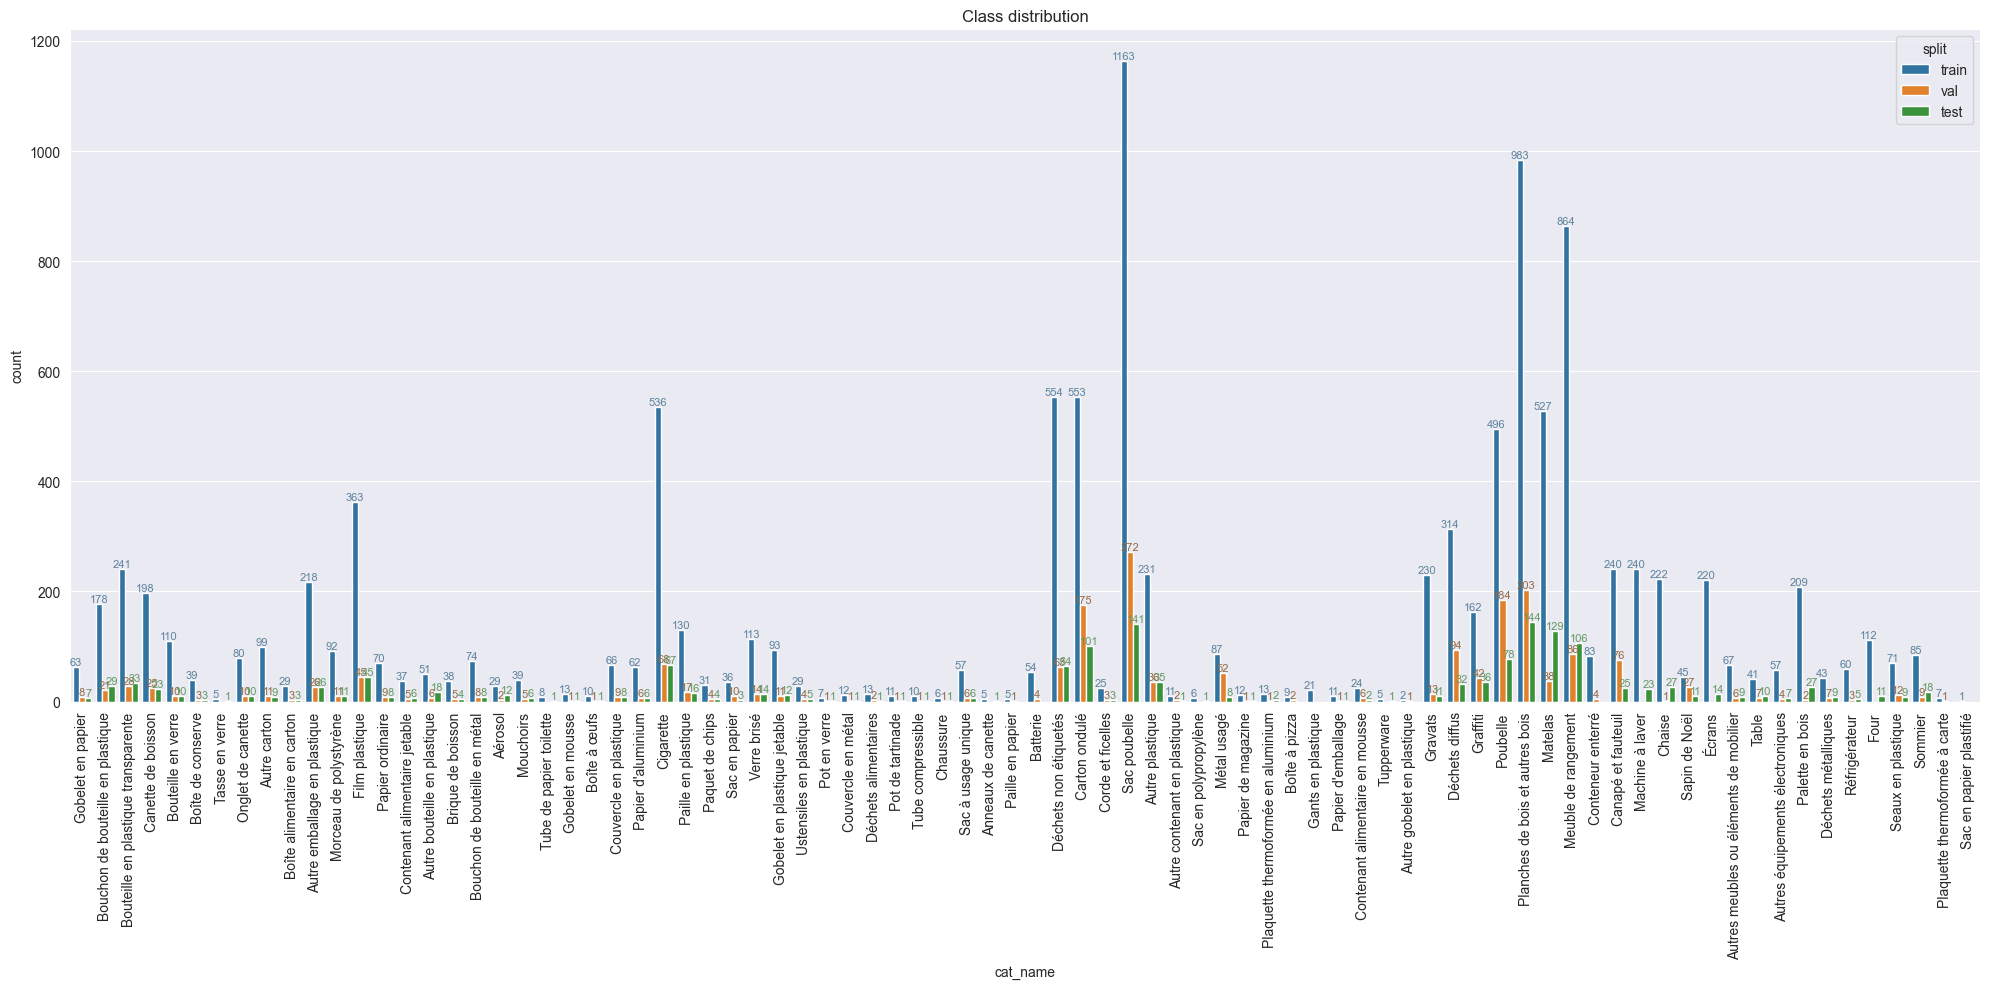

In [43]:
print_class_distribution(fused_final_meta_df, FINAL_FUSED_DATASET_ROOT_PATH)

## generate data.yaml

In [ ]:
print(CATIDX_2_FR_CATNAME.values())